# Loading

In [ ]:
!pip install scltnn
!pip install scvelo
!pip install pyomic
!pip install anndata
!pip3 install leidenalg
!pip install sccoda
!pip install decoupler
!pip install colormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
#导入包
import anndata
print('anndata(Ver): ',anndata.__version__)
import scanpy as sc
print('scanpy(Ver): ',sc.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('matplotlib(Ver): ',matplotlib.__version__)
import seaborn as sns
print('seaborn(Ver): ',sns.__version__)
import numpy as np
print('numpy(Ver): ',np.__version__)
import pandas as pd
print('pandas(Ver): ',pd.__version__)
import scvelo as scv
print('scvelo(Ver): ',scv.__version__)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Data preprocess

In [ ]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')

In [ ]:
adata_cd8 = adata[adata.obs[adata.obs['T/NK_type']=='CD8'].index,:]
adata_cd8

View of AnnData object with n_obs × n_vars = 6329 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_cd8.obs

,Person,Sample,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden,major_celltype,T/NK_celltype,T/NK_type
AAACCTGTCTAACTTC-1-HP_POS_2,HP_POS_2,POS,3252,0.015161,False,3252,10150.0,451.0,4.443350,1,0,8,NK/T cell,CD8.T.MAIT,CD8
AAACGGGAGGCGCTCT-1-HP_POS_2,HP_POS_2,POS,1472,0.033851,False,1472,3025.0,133.0,4.396694,1,0,0,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
AAAGATGAGGCATGGT-1-HP_POS_2,HP_POS_2,POS,3372,0.009850,False,3372,10124.0,416.0,4.109048,1,0,11,NK/T cell,CD8.T.Exhausted,CD8
AAAGATGTCCCAAGTA-1-HP_POS_2,HP_POS_2,POS,1604,0.016651,False,1604,3592.0,80.0,2.227171,1,0,4,NK/T cell,CD8.T.Effector_Memory,CD8
AAAGCAAAGCTAGCCC-1-HP_POS_2,HP_POS_2,POS,1872,0.006018,False,1872,4691.0,347.0,7.397143,1,0,0,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGAAGCACTCAGGC-1-HP_NEG_2,HP_NEG_2,NEG,818,0.130719,False,818,1560.0,26.0,1.666667,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
TTCTTAGTCAACCATG-1-HP_NEG_2,HP_NEG_2,NEG,2496,0.038961,False,2496,5373.0,131.0,2.438117,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
TTGCCGTAGAATTCCC-1-HP_NEG_2,HP_NEG_2,NEG,2066,0.069465,False,2066,4767.0,234.0,4.908748,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
TTGCGTCGTTCGCTAA-1-HP_NEG_2,HP_NEG_2,NEG,1282,0.199063,False,1282,2644.0,41.0,1.550681,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8


In [ ]:
adata_cd8.write('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_CD8_anno.h5ad',compression='gzip')

In [ ]:
adata_cd8_neg = adata[(adata.obs['T/NK_celltype']=='CD8.T.Tissue_Resident_Memory')&(adata.obs['Sample']=='NEG')]
adata_cd8_neg

View of AnnData object with n_obs × n_vars = 1318 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_cd8_neg.write('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_CD8_Neg_anno.h5ad',compression='gzip')

# Differential Gene Expression

## Loading data

In [ ]:
adata_cd8_neg = adata_pos_cd8 = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_CD8_Neg_anno.h5ad')
adata_cd8_neg

AnnData object with n_obs × n_vars = 1318 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_cd8_neg.layers['counts'].todense().max()

1224.0

In [ ]:
# 数据预处理
adata_cd8_neg = adata_cd8_neg.raw.to_adata()
sc.pp.filter_genes(adata_cd8_neg, min_cells=3)
#sc.pp.normalize_total(adata_neg_cd8_activated)
#sc.pp.log1p(adata_neg_cd8_activated)
#sc.pp.scale(adata_neg_cd8_activated)
adata_cd8_neg

filtered out 11907 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 1318 × 14358
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_pos_cd8 = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_CD8_Pos_anno.h5ad')
adata_pos_cd8

AnnData object with n_obs × n_vars = 5011 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## CD8_Activated VS CD8_GZMK

In [ ]:
adata_pos_cd8_TRM = adata_pos_cd8[adata_pos_cd8.obs[adata_pos_cd8.obs['T/NK_celltype']=='CD8.T.Tissue_Resident_Memory'].index,:]
adata_pos_cd8_TRM

In [ ]:
adata_pos_cd8_TRM.X.max()

ArrayView(10., dtype=float32)

In [ ]:
adata_pos_cd8_TRM = adata_pos_cd8_TRM.raw.to_adata()
sc.pp.filter_genes(adata_pos_cd8_TRM, min_cells=3)
#sc.pp.normalize_total(adata_pos_cd8_GZMK)
#sc.pp.log1p(adata_pos_cd8_GZMK)
#sc.pp.scale(adata_pos_cd8_GZMK)

filtered out 11662 genes that are detected in less than 3 cells


In [ ]:
#得到activated跟gzmk共有的基因集
ret_gene=list(set(adata_cd8_neg.var.index.tolist()) & set(adata_pos_cd8_TRM.var.index.tolist()))
len(ret_gene)
#筛选共有基因
adata_cd8_neg=adata_cd8_neg[:,ret_gene]
adata_pos_cd8_TRM=adata_pos_cd8_TRM[:,ret_gene]
adata_pos_cd8_TRM,adata_cd8_neg

(View of AnnData object with n_obs × n_vars = 1999 × 13491
     obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
     var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
     obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 1318 × 13491
     obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_m

In [ ]:
from scipy  import stats,sparse

def scdeg(adata1,adata2):
    mean1=adata1.X.mean(axis=0)
    mean2=adata2.X.mean(axis=0)

    if sparse.issparse(adata1.X):
        fold=np.array(adata1.X.mean(axis=0)-adata2.X.mean(axis=0))[0]
        #fold=fold[0]
        #log2fold=np.log2(fold)
        ttest = stats.ttest_ind(adata1[:,:].X.toarray(),adata2[:,:].X.toarray())
    else:
        fold=adata1.X.mean(axis=0)-adata2.X.mean(axis=0)
        #log2fold=np.log2(fold)
        ttest = stats.ttest_ind(adata1[:,:].X,adata2[:,:].X) 
    pvalue=ttest.pvalue+1e-100

    res=pd.DataFrame(index=adata1.var.index)
    res['log2FC']=fold
    res['pvalue']=pvalue
    return res

In [ ]:
deg_r=scdeg(adata_pos_cd8_TRM,adata_cd8_neg)
deg_r['-log10pvalue']=''
deg_r['-log10pvalue']=-np.log10(deg_r['pvalue'])
deg_r

,log2FC,pvalue,-log10pvalue
EEF1A1,0.014906,4.577169e-01,0.339403
AL353708.3,0.003480,4.109868e-01,0.386172
RPS16,0.346221,2.451795e-35,34.610516
PTPMT1,0.031300,4.253452e-02,1.371258
SMIM10L1,0.012661,5.061164e-01,0.295750
...,...,...,...
ZNF213,-0.003566,4.834872e-01,0.315615
HEXIM1,-0.087403,3.053540e-06,5.515196
CLNS1A,0.030473,1.132537e-01,0.945948
MRFAP1,0.095827,4.034205e-05,4.394242


In [ ]:
group = []
data = deg_r
for i in data.index:
    if data['-log10pvalue'][i] > 30.0 and np.abs(data['log2FC'][i]) >= 0.6:
        group.append('Both significant')
    elif data['-log10pvalue'][i] <= 30.0 and np.abs(data['log2FC'][i]) > 0.6:
        group.append('Fold change')
    elif data['-log10pvalue'][i] > 30.0 and np.abs(data['log2FC'][i]) <= 0.6:
        group.append('P value')
    else:
        group.append('Not significant')
data['group'] = group
data = data.sort_values('group')
print(data)

           log2FC         pvalue  -log10pvalue             group
BTG1     0.815800  1.000000e-100    100.000000  Both significant
CXCR4    0.696121   3.499539e-63     62.455989  Both significant
GNLY     0.627261   4.492800e-46     45.347483  Both significant
GZMB     1.058548  1.000000e-100    100.000000  Both significant
PRF1     0.616484   2.899162e-56     55.537727  Both significant
...           ...            ...           ...               ...
RPL13    0.363683   4.307860e-52     51.365738           P value
IGKV1-5  0.207222   1.642049e-33     32.784614           P value
FTL      0.471745   6.833128e-49     48.165380           P value
SARAF    0.369253   1.107900e-36     35.955500           P value
LCP2    -0.404176   1.263849e-34     33.898305           P value

[13491 rows x 4 columns]


In [ ]:
!pip install adjustText
import adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=beb212be4bb2d7dc18d3f9a21db291771f491436feea2a49ccf1fdb5054a9abb
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


Text(0.5, 1.0, 'Neg_CD8_Trm VS Pos_CD8_Trm')

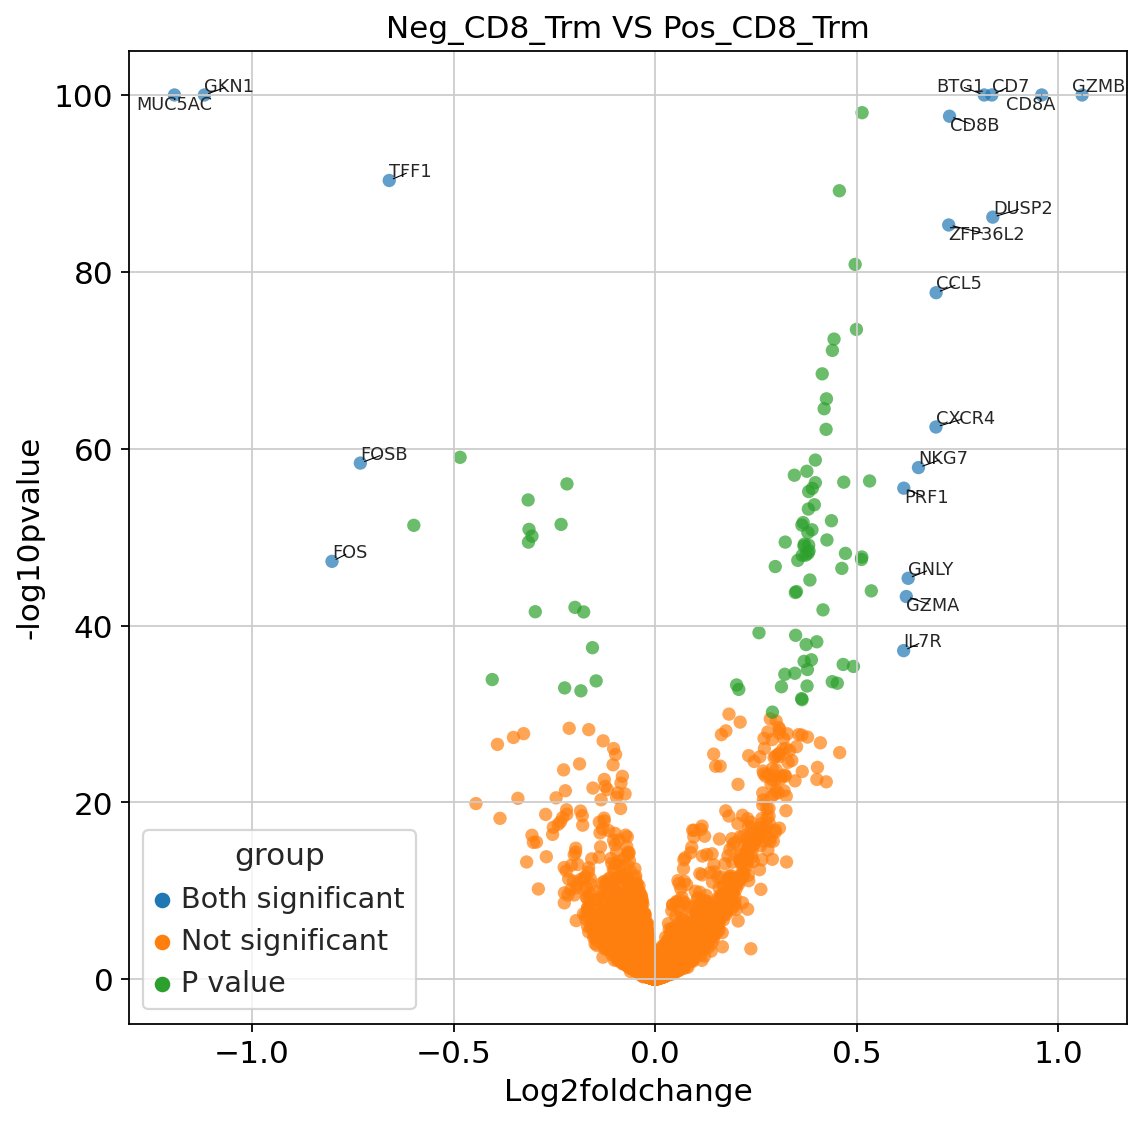

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.set_style("ticks") #设置全局主题
sns.scatterplot(data=data, x="log2FC", y="-log10pvalue", marker='o', alpha=0.7, edgecolor='none',
                hue="group", palette='tab10')
#plt.axvline(x = 0.6, ls = '--', color = 'black', lw = 1) #画虚线
#plt.axvline(x = -0.6, ls = '--', color = 'black', lw = 1)
#plt.axhline(y = 30, ls = '--', color = 'black', lw = 1)
plt.xlabel('Log2foldchange')
markers = data[data['group'] == 'Both significant']
markers['Gene'] = markers.index
texts = []
for i in markers.index:
    x, y, s = markers.loc[i, 'log2FC'], markers.loc[i, '-log10pvalue'], markers.loc[i, 'Gene']
    texts.append(plt.text(x, y, s, fontsize = 8))
from adjustText import adjust_text
adjust_text(texts, force_points=0.2, force_text=1,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.title("Neg_CD8_Trm VS Pos_CD8_Trm") #设置标题
#plt.savefig("Tcell_DEG_B.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Breast_Cancer/Tcell_Figure/Tcell_DEG_B.png",dpi=300,bbox_inches = 'tight')

In [ ]:
len(data[data['log2FC']>0.6])

14

### GSEA(Prerank)

Prerank的输入需要进行排序处理

In [ ]:
gseada=data
#倍数变化规则
gseada['fcsign']=np.sign(gseada['log2FC'])
gseada['metric']=gseada['-log10pvalue']/gseada['fcsign']
gseada.dropna(inplace=True)
gseada

,log2FC,pvalue,-log10pvalue,group,fcsign,metric
BTG1,0.815800,1.000000e-100,100.000000,Both significant,1.0,100.000000
CXCR4,0.696121,3.499539e-63,62.455989,Both significant,1.0,62.455989
GNLY,0.627261,4.492800e-46,45.347483,Both significant,1.0,45.347483
GZMB,1.058548,1.000000e-100,100.000000,Both significant,1.0,100.000000
PRF1,0.616484,2.899162e-56,55.537727,Both significant,1.0,55.537727
...,...,...,...,...,...,...
RPL13,0.363683,4.307860e-52,51.365738,P value,1.0,51.365738
IGKV1-5,0.207222,1.642049e-33,32.784614,P value,1.0,32.784614
FTL,0.471745,6.833128e-49,48.165380,P value,1.0,48.165380
SARAF,0.369253,1.107900e-36,35.955500,P value,1.0,35.955500


In [ ]:
gseada = gseada[~gseada.index.str.contains('RPS')]
gseada = gseada[~gseada.index.str.contains('RPL')]
gseada

,log2FC,pvalue,-log10pvalue,group,fcsign,metric
BTG1,0.815800,1.000000e-100,100.000000,Both significant,1.0,100.000000
CXCR4,0.696121,3.499539e-63,62.455989,Both significant,1.0,62.455989
GNLY,0.627261,4.492800e-46,45.347483,Both significant,1.0,45.347483
GZMB,1.058548,1.000000e-100,100.000000,Both significant,1.0,100.000000
PRF1,0.616484,2.899162e-56,55.537727,Both significant,1.0,55.537727
...,...,...,...,...,...,...
SERPINB9,0.376523,6.768833e-34,33.169486,P value,1.0,33.169486
IGKV1-5,0.207222,1.642049e-33,32.784614,P value,1.0,32.784614
FTL,0.471745,6.833128e-49,48.165380,P value,1.0,48.165380
SARAF,0.369253,1.107900e-36,35.955500,P value,1.0,35.955500


In [ ]:
gseada_sig = gseada[gseada.pvalue < 0.05]
gseada_up = gseada_sig[gseada_sig.log2FC > 0]
gseada_dw = gseada_sig[gseada_sig.log2FC < 0]

In [ ]:
gseada_up

,log2FC,pvalue,-log10pvalue,group,fcsign,metric
BTG1,0.815800,1.000000e-100,100.000000,Both significant,1.0,100.000000
CXCR4,0.696121,3.499539e-63,62.455989,Both significant,1.0,62.455989
GNLY,0.627261,4.492800e-46,45.347483,Both significant,1.0,45.347483
GZMB,1.058548,1.000000e-100,100.000000,Both significant,1.0,100.000000
PRF1,0.616484,2.899162e-56,55.537727,Both significant,1.0,55.537727
...,...,...,...,...,...,...
PIK3R1,0.466082,2.487129e-36,35.604302,P value,1.0,35.604302
SERPINB9,0.376523,6.768833e-34,33.169486,P value,1.0,33.169486
IGKV1-5,0.207222,1.642049e-33,32.784614,P value,1.0,32.784614
FTL,0.471745,6.833128e-49,48.165380,P value,1.0,48.165380


In [ ]:
rnk_pos=pd.DataFrame()
rnk_pos['gene_name']=gseada_up.index
rnk_pos['rnk']=gseada_up.loc[:,'log2FC'].values
rnk_pos.dropna()
rnk_pos.sort_values(by=['rnk'],ascending=False,inplace=True)
rnk_pos

,gene_name,rnk
3,GZMB,1.058548
11,CD8A,0.958468
12,DUSP2,0.837122
10,CD7,0.834722
0,BTG1,0.815800
...,...,...
69,CYB5RL,0.007380
822,AC090061.1,0.007259
170,TMEM88,0.006318
270,HLA-DOA,0.006282


In [ ]:
import gseapy as gp
pre_res_pos = gp.prerank(rnk=rnk_pos, # or rnk = rnk,
                     gene_sets='KEGG_2021_Human',
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )
pre_res_pos.res2d['Term'] = pre_res_pos.res2d.index
pre_res_pos.res2d['-log10pvalue'] = -np.log10(pre_res_pos.res2d['pval']+0.001)
pre_res_pos

Creating directory /root/.config/bioservices 


In [ ]:
pre_res_pos.res2d['fraction']=pre_res_pos.res2d['matched_size']/pre_res_pos.res2d['geneset_size']
pre_res_pos.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,Term,-log10pvalue,fraction
Term,,,,,,,,,,,
T cell receptor signaling pathway,0.747013,1.781190,0.000000,0.046224,104,18,CD8A;CD8B;PIK3R1;NFKBIA;MAP3K8;CBLB;FYN;CD3E;C...,CD8A;CD8B;PIK3R1;NFKBIA;MAP3K8;CBLB;FYN;CD3E;CD3D,T cell receptor signaling pathway,3.000000,0.173077
Primary immunodeficiency,0.824986,1.753054,0.000000,0.047799,38,9,CD8A;CD8B;IL7R;CD3E;CD3D;JAK3;PTPRC;CD79A;CD8B2,CD8A;CD8B;IL7R;CD3E;CD3D,Primary immunodeficiency,3.000000,0.236842
Hematopoietic cell lineage,0.726533,1.709162,0.000000,0.081592,99,17,CD8A;CD7;CD8B;IL7R;CD55;CD3E;CD3D;ITGA1;CD3G;H...,CD8A;CD7;CD8B;IL7R;CD55;CD3E;CD3D,Hematopoietic cell lineage,3.000000,0.171717
Necroptosis,0.700825,1.641907,0.002024,0.097831,159,17,TNFAIP3;FTL;FTH1;SLC25A5;HSP90AB1;HMGB1;PPIA;S...,TNFAIP3;FTL;FTH1;SLC25A5;HSP90AB1;HMGB1;PPIA;S...,Necroptosis,2.519376,0.106918
Natural killer cell mediated cytotoxicity,0.688636,1.634298,0.007150,0.098284,131,16,GZMB;PRF1;PIK3R1;HLA-A;FYN;KLRD1;KLRC1;HLA-C;H...,GZMB;PRF1;PIK3R1;HLA-A;FYN;KLRD1;KLRC1;HLA-C,Natural killer cell mediated cytotoxicity,2.088834,0.122137
...,...,...,...,...,...,...,...,...,...,...,...
Wnt signaling pathway,0.279668,0.578917,0.947778,0.957865,166,8,SKP1;RAC2;CTBP1;MYC;PRKCB;PPP3CC;TBL1X;INVS,SKP1,Wnt signaling pathway,0.022835,0.048193
Cushing syndrome,0.313666,0.586329,0.946619,0.958925,155,5,CDKN1B;GNAS;CDKN1A;MAP2K2;CDKN2A,CDKN1B,Cushing syndrome,0.023366,0.032258
Thyroid cancer,0.315668,0.592273,0.938607,0.960584,37,5,BAX;CDKN1A;MYC;MAP2K2;BAK1,BAX;CDKN1A;MYC;MAP2K2;BAK1,Thyroid cancer,0.027054,0.135135


In [ ]:
plot_data2 = pre_res_pos.res2d.sort_values('fdr')[:9].sort_values('nes')
plot_data2 = plot_data2.sort_values('fraction')
plot_data2

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,Term,-log10pvalue,fraction
Term,,,,,,,,,,,
Toll-like receptor signaling pathway,0.734682,1.605144,0.013699,0.120239,104,10,CCL5;PIK3R1;NFKBIA;MAP3K8;CCL4;CCL4L2;NFKB1;CC...,CCL5;PIK3R1;NFKBIA;MAP3K8;CCL4,Toll-like receptor signaling pathway,1.832723,0.096154
Lipid and atherosclerosis,0.687698,1.644618,0.001011,0.107905,215,22,CCL5;PIK3R1;NFKBIA;HSPA5;HSP90AB1;CYCS;CALM2;C...,CCL5;PIK3R1;NFKBIA;HSPA5;HSP90AB1;CYCS;CALM2;C...,Lipid and atherosclerosis,2.696562,0.102326
Necroptosis,0.700825,1.641907,0.002024,0.097831,159,17,TNFAIP3;FTL;FTH1;SLC25A5;HSP90AB1;HMGB1;PPIA;S...,TNFAIP3;FTL;FTH1;SLC25A5;HSP90AB1;HMGB1;PPIA;S...,Necroptosis,2.519376,0.106918
Leukocyte transendothelial migration,0.717042,1.615157,0.001041,0.114509,114,13,CXCR4;PIK3R1;EZR;CYBA;RHOH;MYL12B;RAC2;MYL12A;...,CXCR4;PIK3R1;EZR;CYBA;RHOH;MYL12B,Leukocyte transendothelial migration,2.690246,0.114035
Natural killer cell mediated cytotoxicity,0.688636,1.634298,0.007150,0.098284,131,16,GZMB;PRF1;PIK3R1;HLA-A;FYN;KLRD1;KLRC1;HLA-C;H...,GZMB;PRF1;PIK3R1;HLA-A;FYN;KLRD1;KLRC1;HLA-C,Natural killer cell mediated cytotoxicity,2.088834,0.122137
Measles,0.694200,1.649120,0.000000,0.117485,139,19,TNFAIP3;PIK3R1;NFKBIA;CBLB;CYCS;CD3E;CD3D;STAT...,TNFAIP3;PIK3R1;NFKBIA;CBLB;CYCS;CD3E;CD3D;STAT...,Measles,3.000000,0.136691
Hematopoietic cell lineage,0.726533,1.709162,0.000000,0.081592,99,17,CD8A;CD7;CD8B;IL7R;CD55;CD3E;CD3D;ITGA1;CD3G;H...,CD8A;CD7;CD8B;IL7R;CD55;CD3E;CD3D,Hematopoietic cell lineage,3.000000,0.171717
T cell receptor signaling pathway,0.747013,1.781190,0.000000,0.046224,104,18,CD8A;CD8B;PIK3R1;NFKBIA;MAP3K8;CBLB;FYN;CD3E;C...,CD8A;CD8B;PIK3R1;NFKBIA;MAP3K8;CBLB;FYN;CD3E;CD3D,T cell receptor signaling pathway,3.000000,0.173077
Primary immunodeficiency,0.824986,1.753054,0.000000,0.047799,38,9,CD8A;CD8B;IL7R;CD3E;CD3D;JAK3;PTPRC;CD79A;CD8B2,CD8A;CD8B;IL7R;CD3E;CD3D,Primary immunodeficiency,3.000000,0.236842


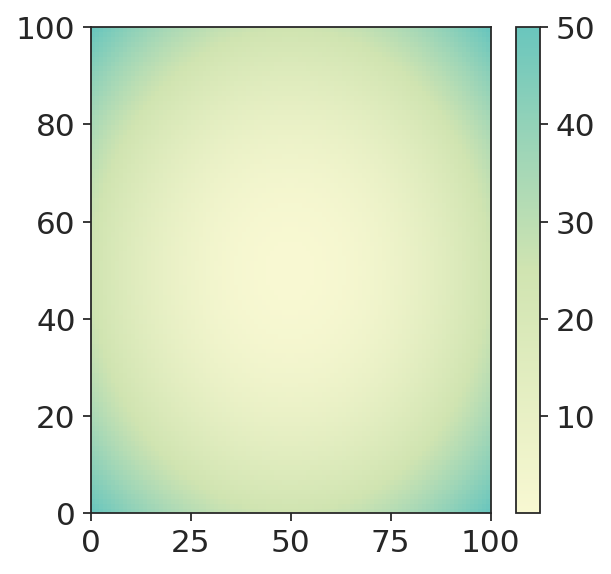

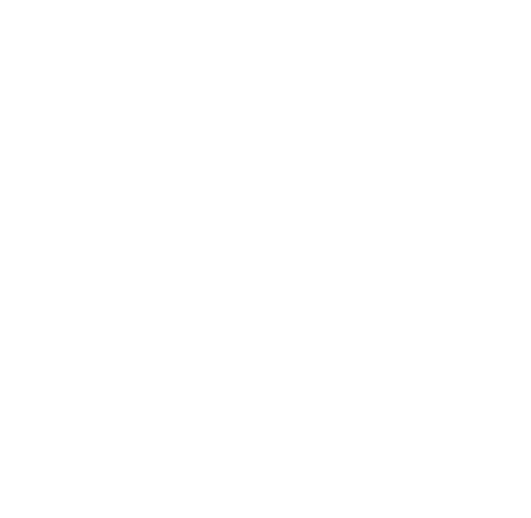

In [ ]:
# 绘图备用函数

def plot_text_set(text):
    if len(text)>40:
        ty=text.split(' ')
        ty_len=len(ty)
        ty_mid=ty_len//2
        res=''
        for i in range(ty_len):
            if i!=ty_mid:
                res+=ty[i]+' '
            else:
                res+='\n'+ty[i]+' '
        return res
    else:
        return text

from colormap import Colormap
c = Colormap()
gocmap = c.cmap_linear('#F8F8D2','#D0E4B1','#6AC6BD',)
c.test_colormap(gocmap)

Text(1.75, -15, 'Count')

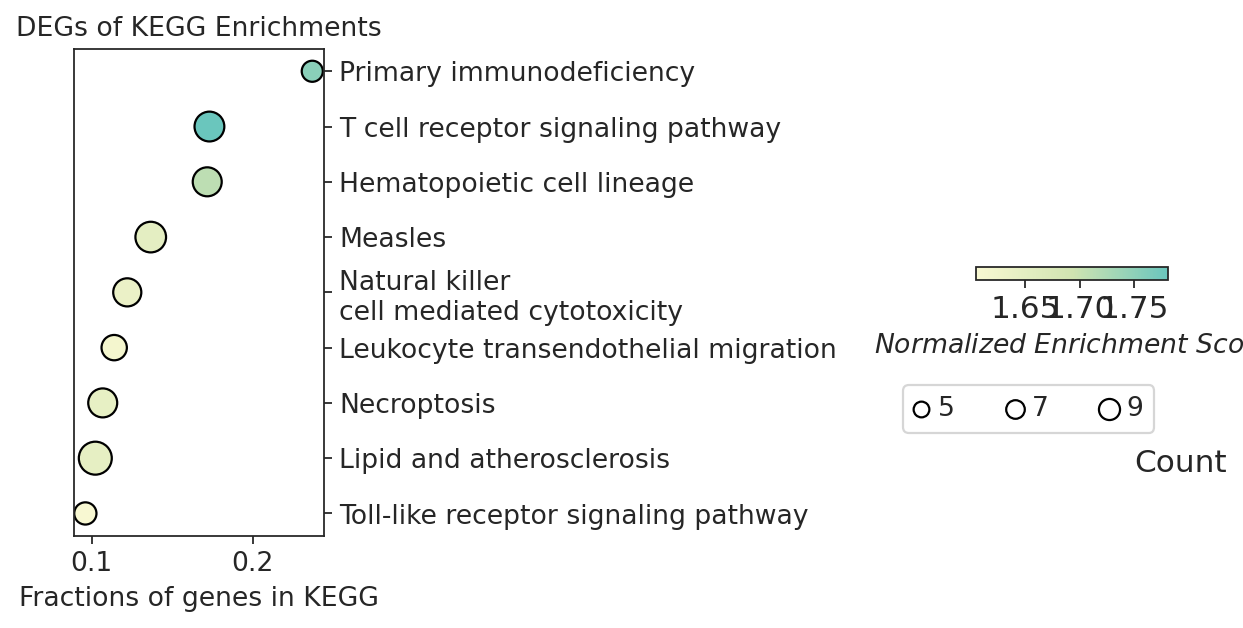

In [ ]:
# color
gocmap = c.cmap_linear('#F8F8D2','#D0E4B1','#6AC6BD',)

pp=plt.figure(figsize=(2,4))
#用ax控制图片
ax=pp.add_subplot(1,1,1)

#圆圈大小控制
a = 10

#plot_data2 = pre_res_pos.res2d.sort_values('fdr')[:9].sort_values('nes')
b=plt.scatter(plot_data2['fraction'],range(len(plot_data2['nes'])),
           s=plot_data2['matched_size']*a,linewidths=1,edgecolors='black',c=plot_data2['nes'],cmap=gocmap)
ax.yaxis.tick_right()
plt.yticks(range(len(plot_data2['fraction'])),[plot_text_set(i.split('(')[0]) for i in plot_data2['Term']],
          fontsize=12,)
plt.xticks(fontsize=12,)
plt.title('DEGs of KEGG Enrichments',fontsize=12)
plt.xlabel('Fractions of genes in KEGG',fontsize=12)


fig = plt.gcf()
cax = fig.add_axes([3, 0.55, 0.6, 0.02])
#im = cax.imshow(plot_data2['logp'], cmap=gocmap)

#绘制图例栏
cb=plt.colorbar(shrink=0.25,cax=cax,orientation='horizontal')
cb.set_label(r'$Normalized$ $Enrichment$ $Score$',fontdict={'size':12})

gll = plt.scatter([],[], s=5*a, marker='o', color='white',edgecolors='black')
gl = plt.scatter([],[], s=7*a, marker='o', color='white',edgecolors='black')
ga = plt.scatter([],[], s=9*a, marker='o', color='white',edgecolors='black')

plt.legend((gll,gl,ga),
       ('5', '7', '9'),
       loc='lower left',
       ncol=3,bbox_to_anchor=(-0.45, -13),
       fontsize=12)
plt.text(1.75,-15,'Count') #这里counts指捕获这个信号通路的基因数目
#plt.savefig("results/figure2_go.png",dpi=300,bbox_inches = 'tight')

### Over-representation analysis (Enrichr API)

enrichr的输入不需要进行排序处理（排序与否不影响结果）

In [ ]:
degs=data
degs

,log2FC,pvalue,-log10pvalue,group,fcsign,metric
BTG1,0.815800,1.000000e-100,100.000000,Both significant,1.0,100.000000
CXCR4,0.696121,3.499539e-63,62.455989,Both significant,1.0,62.455989
GNLY,0.627261,4.492800e-46,45.347483,Both significant,1.0,45.347483
GZMB,1.058548,1.000000e-100,100.000000,Both significant,1.0,100.000000
PRF1,0.616484,2.899162e-56,55.537727,Both significant,1.0,55.537727
...,...,...,...,...,...,...
RPL13,0.363683,4.307860e-52,51.365738,P value,1.0,51.365738
IGKV1-5,0.207222,1.642049e-33,32.784614,P value,1.0,32.784614
FTL,0.471745,6.833128e-49,48.165380,P value,1.0,48.165380
SARAF,0.369253,1.107900e-36,35.955500,P value,1.0,35.955500


In [ ]:
# 删除所有核糖体相关基因
degs = degs[~degs.index.str.contains('RPS')]
degs = degs[~degs.index.str.contains('RPL')]
degs

,log2FC,pvalue,-log10pvalue,group,fcsign,metric
BTG1,0.815800,1.000000e-100,100.000000,Both significant,1.0,100.000000
CXCR4,0.696121,3.499539e-63,62.455989,Both significant,1.0,62.455989
GNLY,0.627261,4.492800e-46,45.347483,Both significant,1.0,45.347483
GZMB,1.058548,1.000000e-100,100.000000,Both significant,1.0,100.000000
PRF1,0.616484,2.899162e-56,55.537727,Both significant,1.0,55.537727
...,...,...,...,...,...,...
SERPINB9,0.376523,6.768833e-34,33.169486,P value,1.0,33.169486
IGKV1-5,0.207222,1.642049e-33,32.784614,P value,1.0,32.784614
FTL,0.471745,6.833128e-49,48.165380,P value,1.0,48.165380
SARAF,0.369253,1.107900e-36,35.955500,P value,1.0,35.955500


In [ ]:
# subset up or down regulated genes
degs_sig = degs[degs.pvalue < 0.05]
degs_up = degs_sig[degs_sig.log2FC > 0]
degs_dw = degs_sig[degs_sig.log2FC < 0]

In [ ]:
#degs_up.sort_values('log2FC',ascending=False,inplace=True)
#degs_dw.sort_values('log2FC',ascending=True,inplace=True)

In [ ]:
degs_up.shape

(1307, 6)

In [ ]:
degs_dw.shape

(2941, 6)

#### GO_Biological_Process

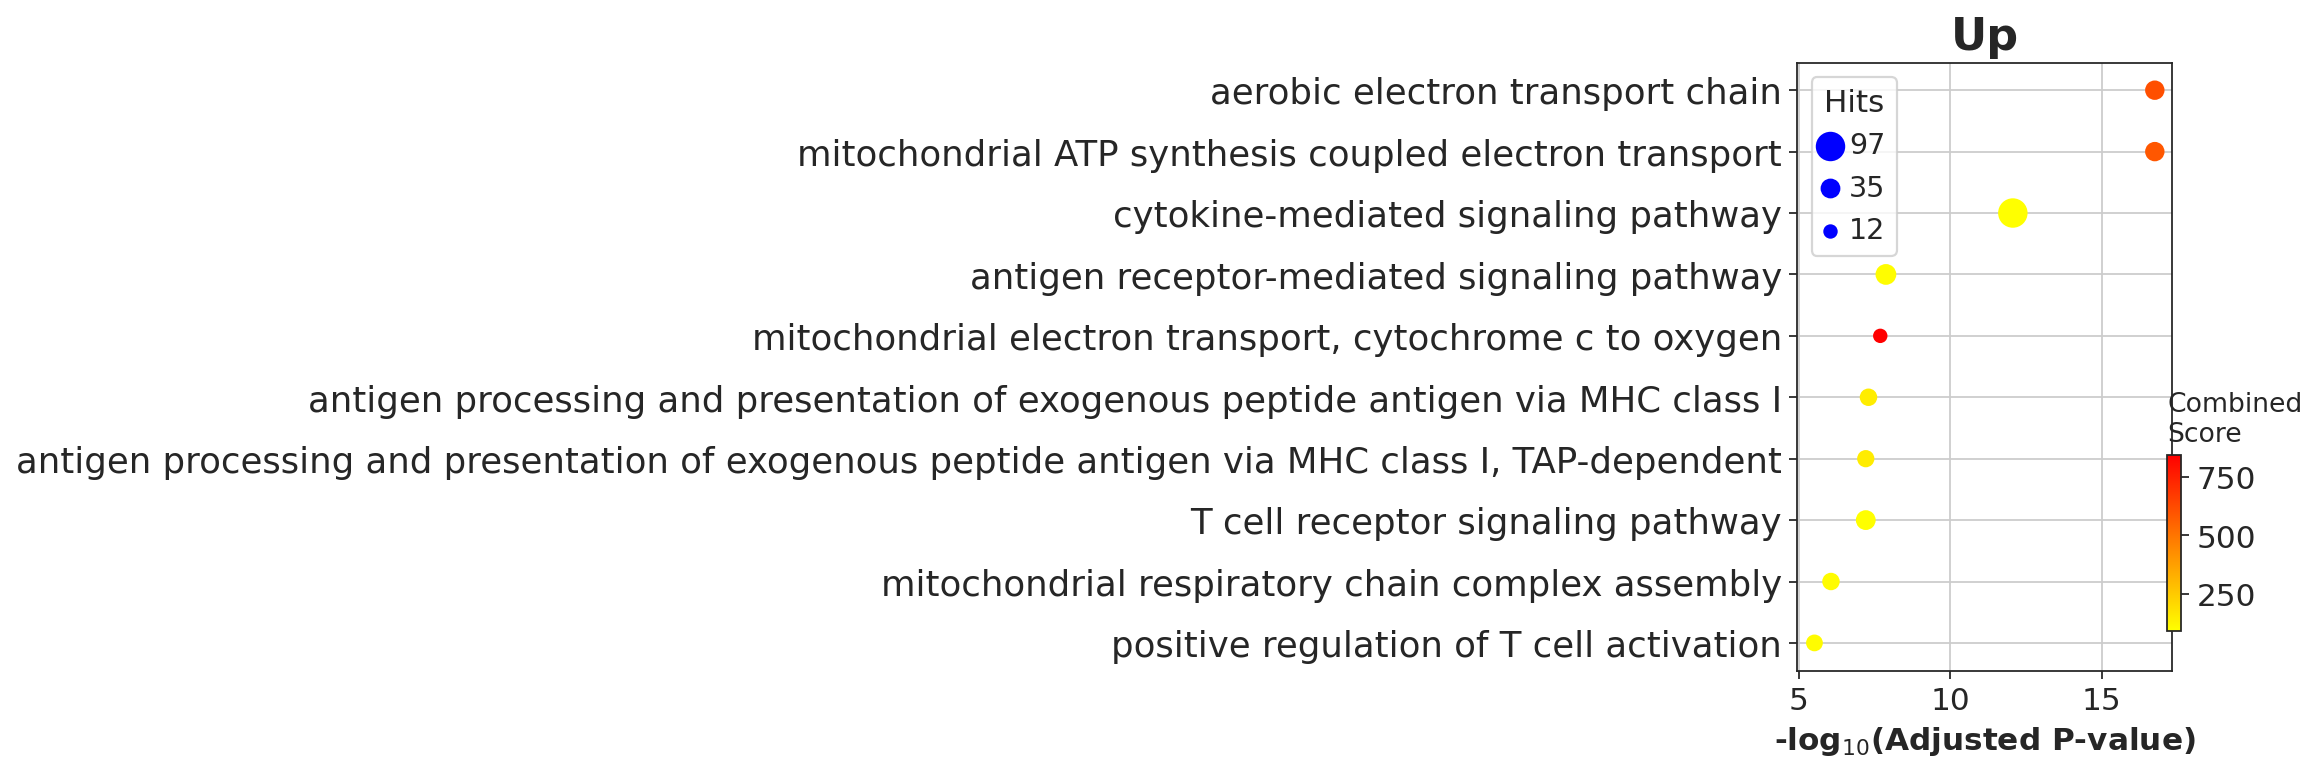

In [ ]:
# Enricr API
enr_up = gp.enrichr(degs_up.index.tolist(),
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

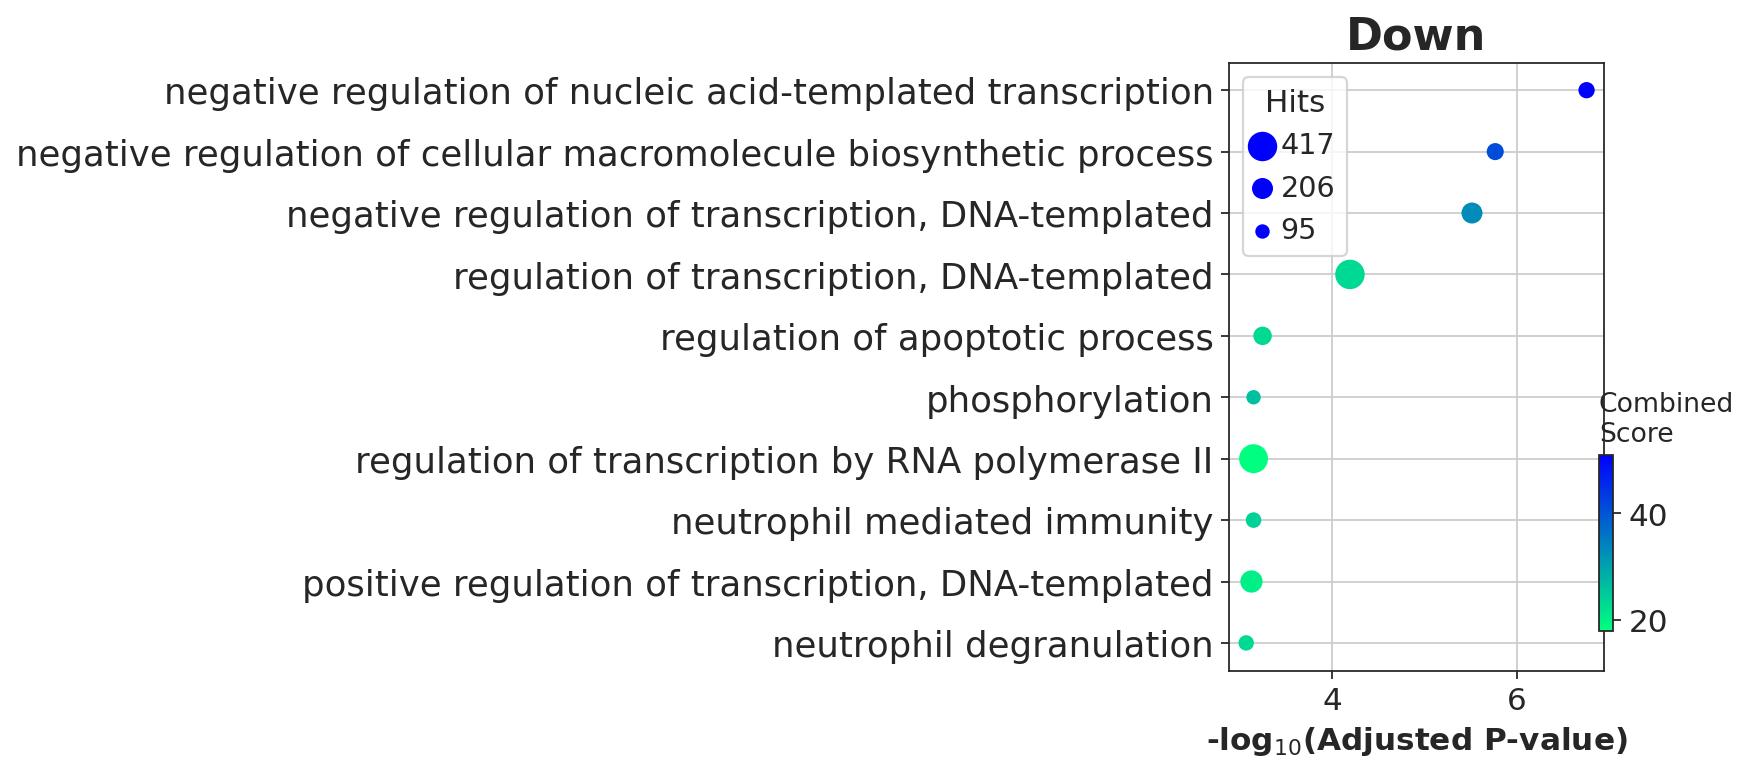

In [ ]:
enr_dw = gp.enrichr(degs_dw.index.tolist(),
                    gene_sets='GO_Biological_Process_2021',
                    outdir=None)
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5)
plt.show()

#### GO_Molecular_Function

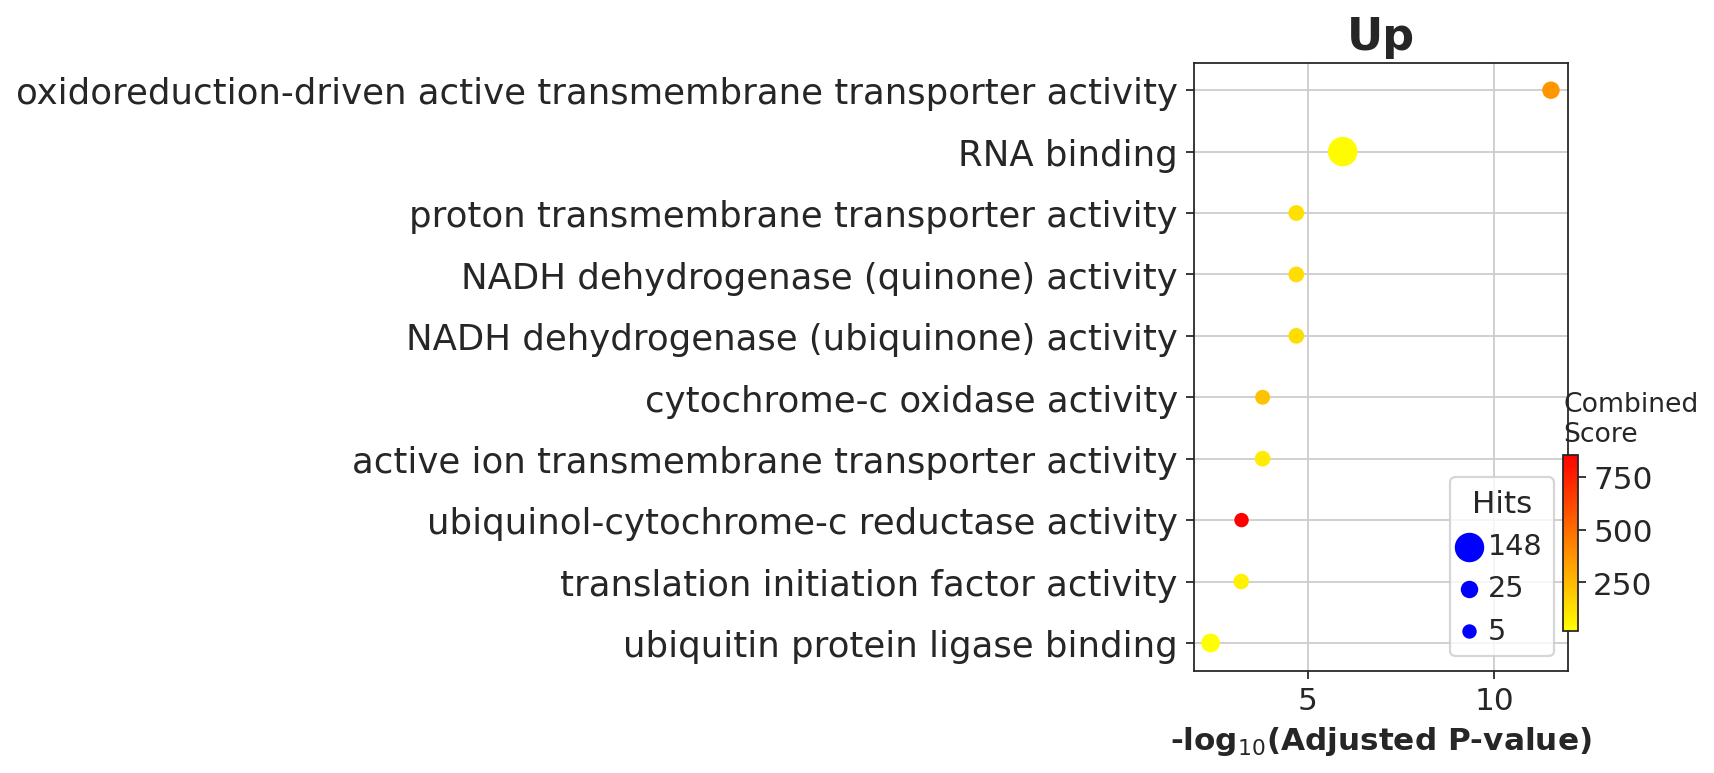

In [ ]:
# Enricr API
enr_up = gp.enrichr(degs_up.index.tolist(),
                    gene_sets='GO_Molecular_Function_2021',
                    outdir=None)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

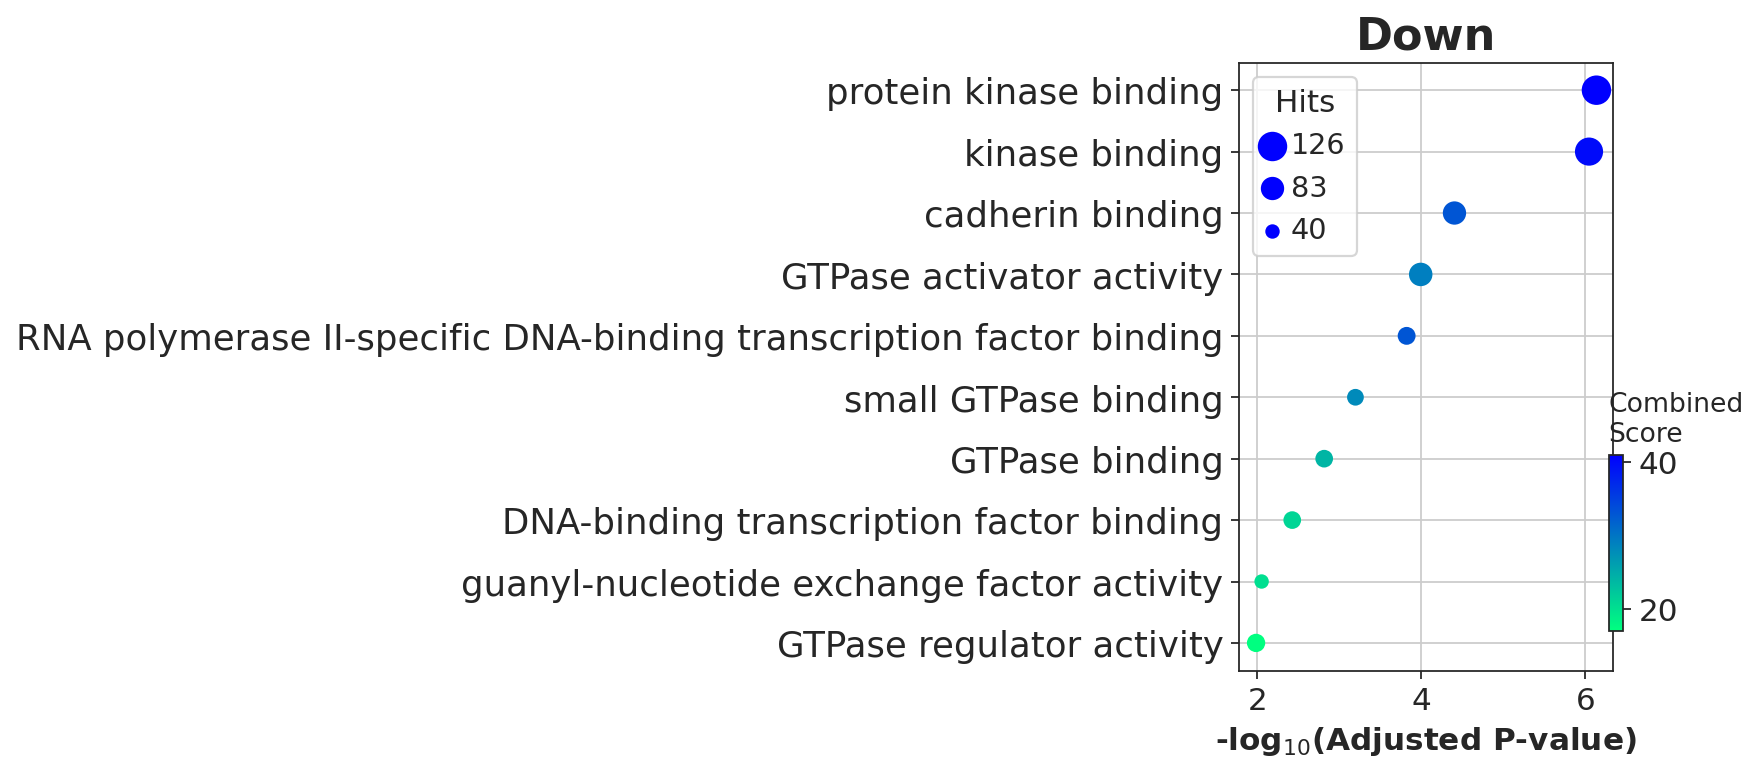

In [ ]:
enr_dw = gp.enrichr(degs_dw.index.tolist(),
                    gene_sets='GO_Molecular_Function_2021',
                    outdir=None)
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5)
plt.show()

#### GO_Cellular_Component

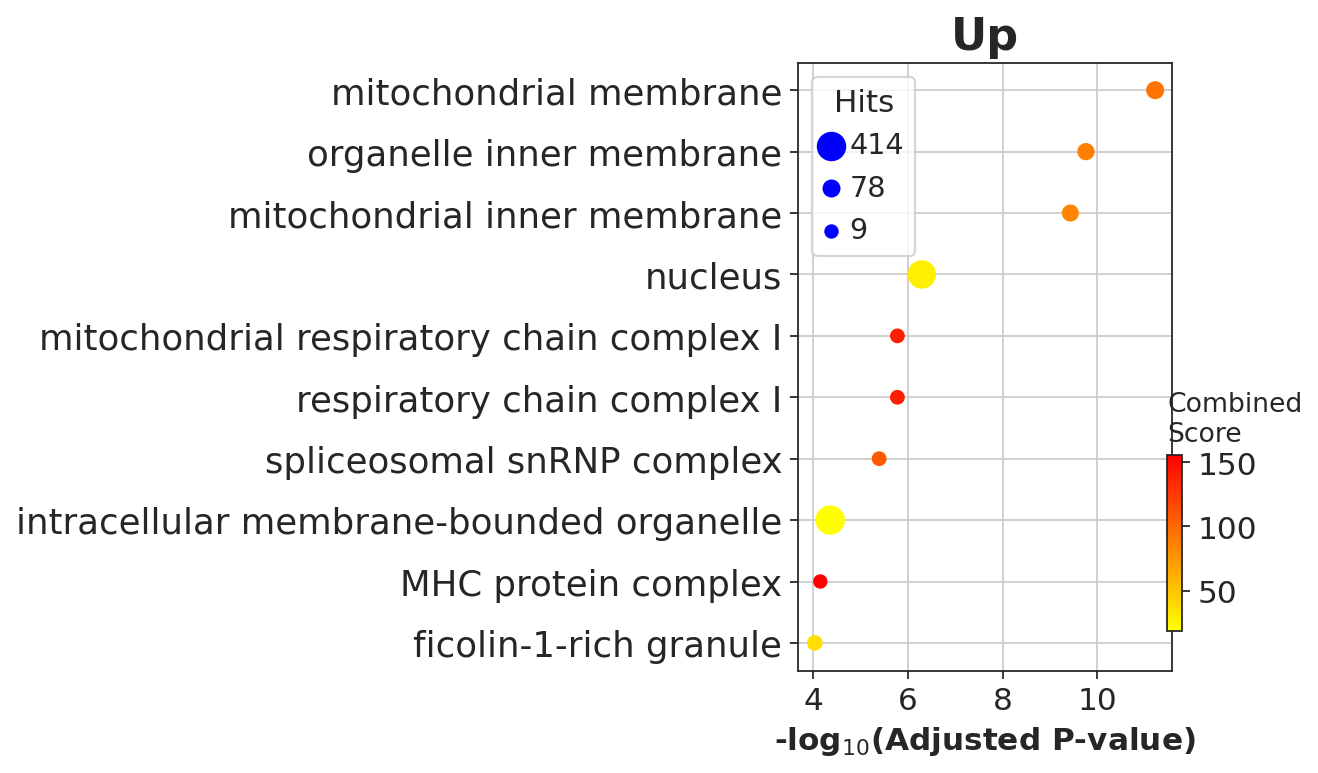

In [ ]:
# Enricr API
enr_up = gp.enrichr(degs_up.index.tolist(),
                    gene_sets='GO_Cellular_Component_2021',
                    outdir=None)
enr_up.res2d.Term = enr_up.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_up.res2d, figsize=(3,5), title="Up", cmap = plt.cm.autumn_r)
plt.show()

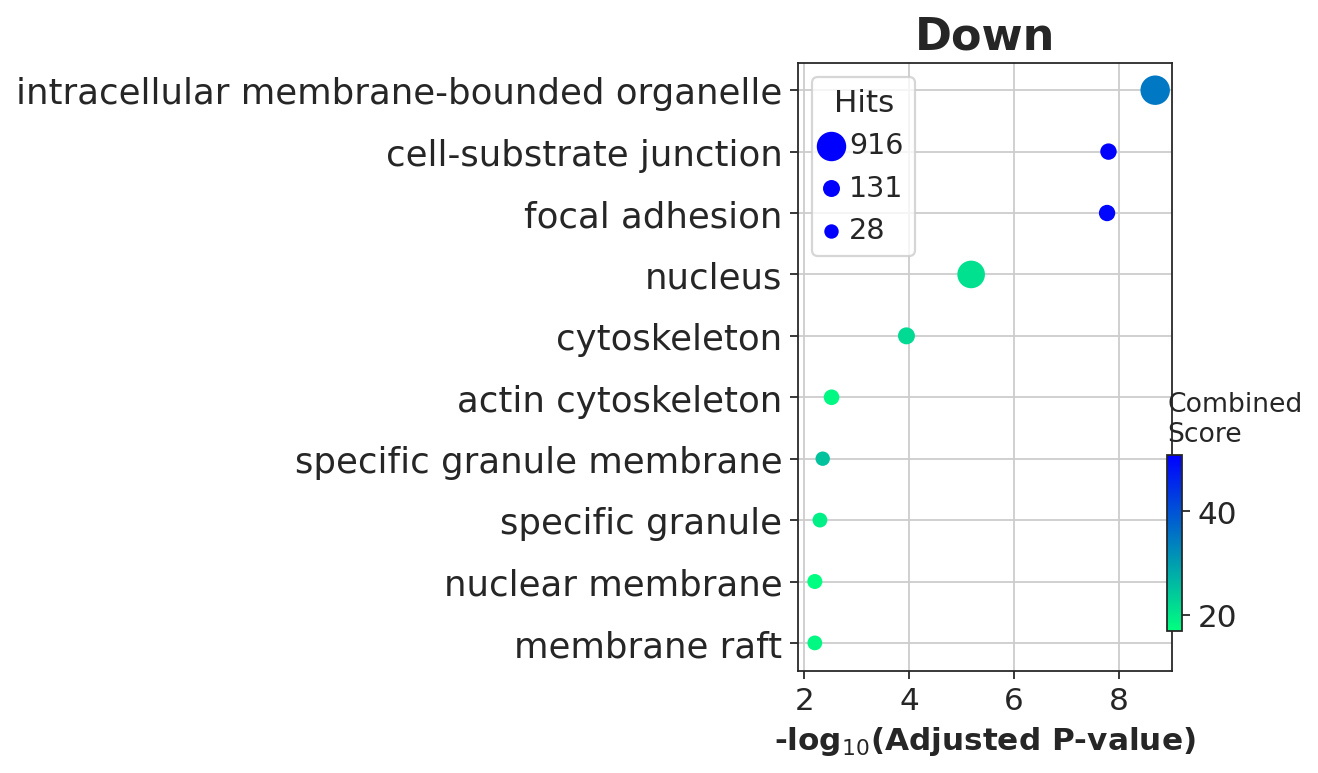

In [ ]:
enr_dw = gp.enrichr(degs_dw.index.tolist(),
                    gene_sets='GO_Cellular_Component_2021',
                    outdir=None)
enr_dw.res2d.Term = enr_dw.res2d.Term.str.split(" \(GO").str[0]
gp.dotplot(enr_dw.res2d,
           figsize=(3,5),
           title="Down",
           cmap = plt.cm.winter_r,
           size=5)
plt.show()

# Pathway Activity Inference

In [ ]:
!pip install decoupler
!pip install omnipath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=81084171ff4bb7ae2dfc2f63035ca26277ad37effe0ea8ca38fa390e560c3278
  Stored in directory: /root/.cache/pip/wheels/48/f0/c9/3928c369e4e0aae8c3daa3c36e5ddf982aed49d3196addc1f0
Successfully built docrep
  Attempting uninstall: inflect
    Found existing installation: inflect 2.1.0
    Uninstalling inflect-2.1.0:
      Successfully uninstalled inflect-2.1.0


In [ ]:
import scanpy as sc
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import seaborn as sns

## Activity inference with Multivariate Linear Model

In [ ]:
model = dc.get_progeny(organism='human', top=100)
model

0.00B [00:00, ?B/s]

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
1395,p53,CCDC150,-3.174527,7.396252e-13
1396,p53,LCE1A,6.154823,8.475458e-13
1397,p53,TREM2,4.101937,9.739648e-13
1398,p53,GDF9,3.355741,1.087433e-12


In [ ]:
dc.run_mlm(mat=adata_pos_cd8, net=model, source='source', target='target', weight='weight', verbose=True)

6377 features of mat are empty, they will be removed.
Running mlm on mat with 5011 samples and 19888 targets for 14 sources.


100%|██████████| 1/1 [00:15<00:00, 15.51s/it]


In [ ]:
adata_pos_cd8.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
AAACCTGTCTAACTTC-1-HP_POS_2,0.136335,1.250844,-0.407639,3.104714,3.486652,1.352454,4.960466,0.016740,-1.457216,0.792774,-0.000375,0.237472,-0.678126,0.011226
AAACGGGAGGCGCTCT-1-HP_POS_2,-1.263487,1.762565,0.127302,0.844951,1.566920,0.993962,1.118572,-0.895681,-1.998121,1.202995,-0.555472,0.163017,0.389651,1.222918
AAAGATGAGGCATGGT-1-HP_POS_2,-1.889938,1.517862,-0.864116,2.479353,2.722001,-0.326276,-1.005403,0.101486,-2.373444,1.929069,2.575652,0.125742,-0.677964,0.853457
AAAGATGTCCCAAGTA-1-HP_POS_2,-0.204167,-0.319802,-0.591757,1.749387,2.595289,0.498338,-1.233248,0.164870,-1.734339,3.107100,1.284101,-0.384955,0.942759,-0.357688
AAAGCAAAGCTAGCCC-1-HP_POS_2,-1.604503,0.264409,0.041115,1.849486,1.672401,0.551337,-0.706720,-0.423348,-2.056329,1.060420,-0.010223,0.701100,0.892493,-0.857028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCCAATAGCGG-1-HP_POS_7,0.061621,2.542062,0.791604,2.603815,1.259310,-0.678557,3.254146,-0.843930,-1.854836,1.022758,-1.066814,0.062702,-0.423816,-0.656356
TTTCCTCTCATGCTCC-1-HP_POS_7,-1.118610,1.797983,-1.319301,1.876699,1.277273,-0.627804,0.083954,-1.942485,-1.483672,2.051512,0.486767,0.165386,-0.105423,0.132968
TTTGGTTAGGATGGTC-1-HP_POS_7,-0.635629,1.913681,0.888496,1.653242,1.128259,-0.683445,-0.500067,0.114278,-1.752559,1.923197,1.558087,-0.564317,-0.353320,-0.762725
TTTGGTTGTCAGCTAT-1-HP_POS_7,-1.377977,3.194607,-0.519045,-0.865152,-0.427805,0.822384,2.029432,-0.364366,-1.003915,2.244166,-0.235850,0.388072,-0.790072,-0.597124


In [ ]:
adata_pos_cd8.obsm['progeny_mlm_estimate'] = adata_pos_cd8.obsm['mlm_estimate'].copy()
adata_pos_cd8.obsm['progeny_mlm_pvals'] = adata_pos_cd8.obsm['mlm_pvals'].copy()
adata_pos_cd8

AnnData object with n_obs × n_vars = 5011 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## Visualization

In [ ]:
acts = dc.get_acts(adata_pos_cd8, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 5011 × 14
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals'

In [ ]:
mean_acts = dc.summarize_acts(acts, groupby= 'T/NK_celltype', min_std=0)
mean_acts

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
CD8.T.Early_Activated,-0.381320,1.162257,-0.112286,1.080632,1.262289,0.248301,1.730819,-0.297495,-0.856814,0.637465,0.219248,0.001015,-0.023901,-0.153901
CD8.T.Effector_Memory,-0.372001,0.820425,-0.263877,1.610235,1.963899,0.169013,0.269219,-0.605255,-1.160366,1.414351,0.818418,0.160444,0.222639,-0.262715
CD8.T.Exhausted,-0.566749,1.290175,-0.335988,1.954833,1.943806,0.026559,0.601719,-0.570880,-1.294449,1.411386,0.274037,0.068374,-0.000437,-0.043270
CD8.T.MAIT,-0.280193,1.705145,0.043437,2.276407,2.035443,0.384269,1.590284,-0.475241,-1.086191,1.399235,0.609085,0.148336,0.195278,-0.064799
CD8.T.Tissue_Resident_Memory,-0.605386,1.007907,-0.239237,2.154019,2.190875,-0.062444,0.546286,-0.444653,-1.334015,1.312658,0.432217,0.102769,0.291873,-0.151509


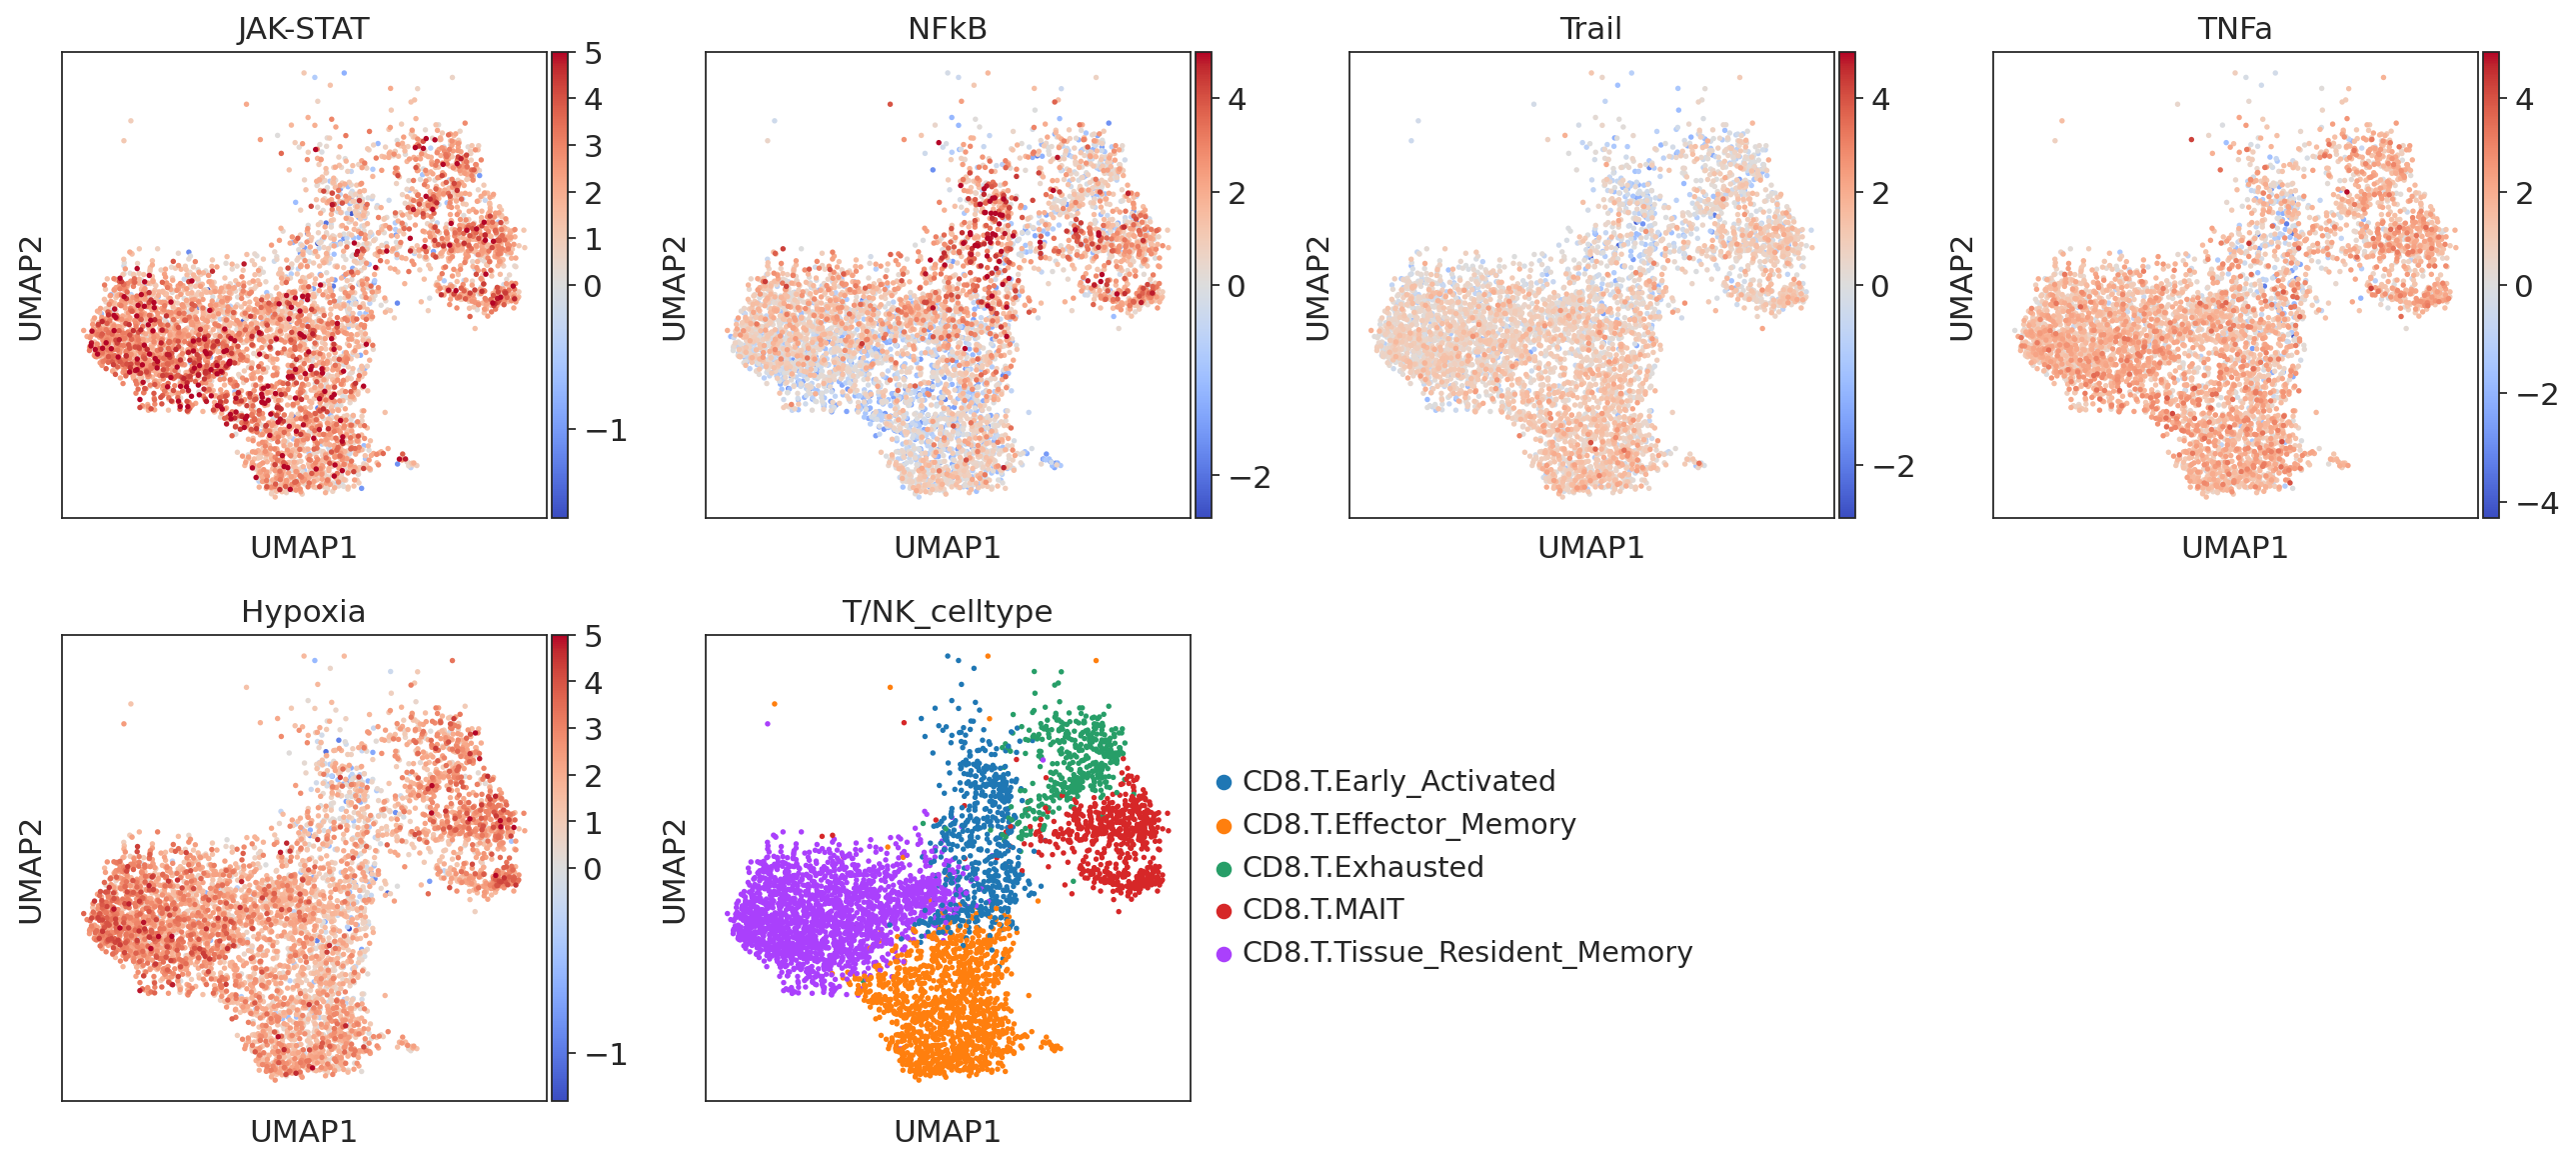

In [ ]:
sc.pl.umap(acts, color=['JAK-STAT','NFkB','Trail','TNFa','Hypoxia','T/NK_celltype'], vcenter=0, cmap='coolwarm',vmax=5)


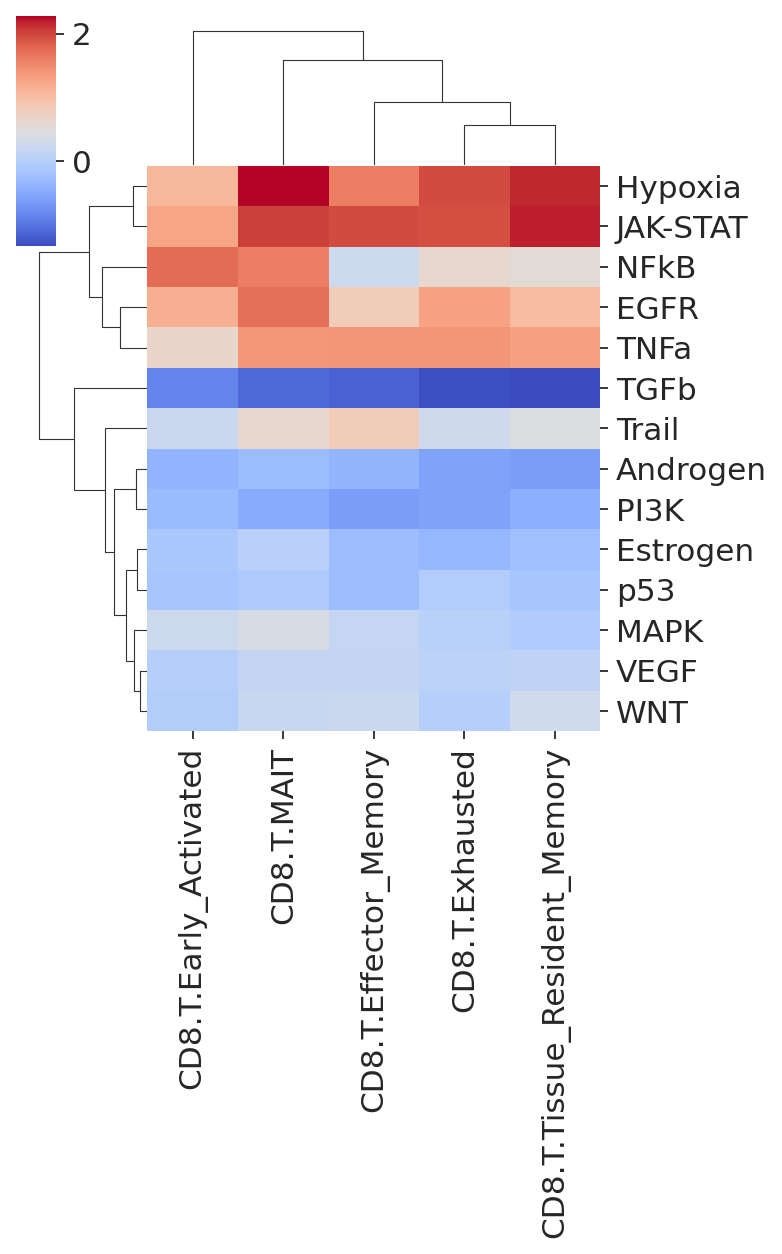

In [ ]:
sns.clustermap(mean_acts.T, xticklabels=mean_acts.index, #vmin=-2, #vmax=2, 
               cmap='coolwarm', figsize=(5, 8))
plt.show()

# Functional enrichment of biological terms

## Dataset

In [ ]:
import scanpy as sc
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
msigdb = dc.get_resource('MSigDB')
msigdb

0.00B [00:00, ?B/s]

0.00B [00:00, ?B/s]

,genesymbol,collection,geneset
0,MSC,oncogenic_signatures,PKCA_DN.V1_DN
1,MSC,mirna_targets,MIR12123
2,MSC,chemical_and_genetic_perturbations,NIKOLSKY_BREAST_CANCER_8Q12_Q22_AMPLICON
3,MSC,immunologic_signatures,GSE32986_UNSTIM_VS_GMCSF_AND_CURDLAN_LOWDOSE_S...
4,MSC,chemical_and_genetic_perturbations,BENPORATH_PRC2_TARGETS
...,...,...,...
2407729,OR2W5P,immunologic_signatures,GSE22601_DOUBLE_NEGATIVE_VS_CD8_SINGLE_POSITIV...
2407730,OR2W5P,immunologic_signatures,KANNAN_BLOOD_2012_2013_TIV_AGE_65PLS_REVACCINA...
2407731,OR52L2P,immunologic_signatures,GSE22342_CD11C_HIGH_VS_LOW_DECIDUAL_MACROPHAGE...
2407732,CSNK2A3,immunologic_signatures,OCONNOR_PBMC_MENVEO_ACWYVAX_AGE_30_70YO_7DY_AF...


In [ ]:
go = dc.get_resource('GO_Intercell')
go

0.00B [00:00, ?B/s]

,genesymbol,mainclass
0,SST,secreted ligands
1,SST,extracellular
2,SST,junction
3,SST,receptor activation
4,SST,receptor regulation
...,...,...
51710,EOLA1,signal release
51711,HMHB1,signal release
51712,CACNA1I,secretion
51713,SYT16,secretion


数据库说明：
https://www.jianshu.com/p/f750ddcc440d

In [ ]:
msigdb['collection'].unique()

array(['oncogenic_signatures', 'mirna_targets',
       'chemical_and_genetic_perturbations', 'immunologic_signatures',
       'tf_targets', 'hallmark', 'cancer_modules', 'positional',
       'reactome_pathways', 'kegg_pathways', 'biocarta_pathways',
       'pid_pathways', 'cancer_gene_neighborhoods'], dtype=object)

In [ ]:
# 其他数据库
dc.show_resources()

['Adhesome',
 'Almen2009',
 'Baccin2019',
 'CORUM_Funcat',
 'CORUM_GO',
 'CSPA',
 'CSPA_celltype',
 'CancerDrugsDB',
 'CancerGeneCensus',
 'CancerSEA',
 'CellCall',
 'CellCellInteractions',
 'CellChatDB',
 'CellChatDB_complex',
 'CellPhoneDB',
 'CellPhoneDB_complex',
 'CellTalkDB',
 'CellTypist',
 'Cellinker',
 'Cellinker_complex',
 'ComPPI',
 'CytoSig',
 'DGIdb',
 'DisGeNet',
 'EMBRACE',
 'Exocarta',
 'GO_Intercell',
 'GPCRdb',
 'Guide2Pharma',
 'HGNC',
 'HPA_secretome',
 'HPA_subcellular',
 'HPA_tissue',
 'HPMR',
 'HumanCellMap',
 'ICELLNET',
 'ICELLNET_complex',
 'IntOGen',
 'Integrins',
 'KEGG-PC',
 'Kirouac2010',
 'LOCATE',
 'LRdb',
 'MCAM',
 'MSigDB',
 'Matrisome',
 'MatrixDB',
 'Membranome',
 'NetPath',
 'OPM',
 'PROGENy',
 'PanglaoDB',
 'Phobius',
 'Phosphatome',
 'Ramilowski2015',
 'Ramilowski_location',
 'SIGNOR',
 'SignaLink_function',
 'SignaLink_pathway',
 'Surfaceome',
 'TCDB',
 'TFcensus',
 'TopDB',
 'UniProt_family',
 'UniProt_keyword',
 'UniProt_location',
 'UniProt_ti

In [ ]:
# Filter by hallmark 
#As an example, we will use the hallmark gene sets, but we could have used any other such as KEGG or REACTOME.
msigdb = msigdb[msigdb['collection']=='kegg_pathways']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]
msigdb

,genesymbol,collection,geneset
230,ICOSLG,kegg_pathways,KEGG_CELL_ADHESION_MOLECULES_CAMS
243,ICOSLG,kegg_pathways,KEGG_INTESTINAL_IMMUNE_NETWORK_FOR_IGA_PRODUCTION
779,RELB,kegg_pathways,KEGG_MAPK_SIGNALING_PATHWAY
889,PLAU,kegg_pathways,KEGG_COMPLEMENT_AND_COAGULATION_CASCADES
1161,TRIP10,kegg_pathways,KEGG_INSULIN_SIGNALING_PATHWAY
...,...,...,...
2407059,OR56A5,kegg_pathways,KEGG_OLFACTORY_TRANSDUCTION
2407063,OR51A7,kegg_pathways,KEGG_OLFACTORY_TRANSDUCTION
2407067,OR2G2,kegg_pathways,KEGG_OLFACTORY_TRANSDUCTION
2407070,OR56A3,kegg_pathways,KEGG_OLFACTORY_TRANSDUCTION


## Enrichment with Over Representation Analysis

To test if a gene set is enriched in a given cell, we will run Over Representation Analysis (ora), also known as Fisher exact test, but we could do it with any of the other available methods in decoupler.

为了测试一个基因组是否在给定的细胞中富集，我们将运行表示分析(ora) ，也称为 Fisher 精确检验，但是我们可以使用解耦器中的任何其他可用方法来做到这一点。

ora selects the top 5% expressed genes for each cell, and tests if a gene set is enriched in the top (or bottom) expressed collection.

Ora 为每个细胞选择表达量最高的5% 的基因，并测试基因集是否在表达量最高(或最低)的集合中富集。

To run decoupler methods, we need an input matrix (mat), an input prior knowledge network/resource (net), and the name of the columns of net that we want to use.

In [ ]:
dc.run_ora(mat=adata_pos_cd8, net=msigdb, source='geneset', target='genesymbol', verbose=True)

6377 features of mat are empty, they will be removed.
Running ora on mat with 5011 samples and 19888 targets for 186 sources.


100%|██████████| 5011/5011 [00:24<00:00, 202.85it/s]


获得的分数(-log10(p-value))(ora_estimate)和 p-值(ora_pval)存储在.obsm键中:


In [ ]:
adata_pos_cd8.obsm['ora_estimate']

source,KEGG_ABC_TRANSPORTERS,KEGG_ACUTE_MYELOID_LEUKEMIA,KEGG_ADHERENS_JUNCTION,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,KEGG_ALLOGRAFT_REJECTION,KEGG_ALPHA_LINOLENIC_ACID_METABOLISM,KEGG_ALZHEIMERS_DISEASE,KEGG_AMINOACYL_TRNA_BIOSYNTHESIS,...,KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY,KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS,KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS,KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION,KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION,KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,KEGG_VEGF_SIGNALING_PATHWAY,KEGG_VIBRIO_CHOLERAE_INFECTION,KEGG_VIRAL_MYOCARDITIS,KEGG_WNT_SIGNALING_PATHWAY
AAACCTGTCTAACTTC-1-HP_POS_2,0.075213,1.262336,3.800045,0.254752,0.133774,0.292613,3.681342,-0.0,14.672720,0.523187,...,8.832279,0.199001,0.52228,0.054043,1.217505,0.925965,0.636827,2.631001,5.295135,1.733461
AAACGGGAGGCGCTCT-1-HP_POS_2,0.075213,-0.000000,2.115215,0.101708,0.133774,-0.000000,7.369615,-0.0,9.503297,-0.000000,...,3.155740,0.944509,0.52228,0.810469,0.605616,1.410554,0.190916,3.281335,6.071658,0.392414
AAAGATGAGGCATGGT-1-HP_POS_2,-0.000000,3.472565,4.446228,1.170689,-0.000000,1.061877,6.361330,-0.0,18.851116,-0.000000,...,11.182437,1.541621,-0.00000,0.458280,2.024461,2.618546,3.420151,3.281335,11.502139,1.081820
AAAGATGTCCCAAGTA-1-HP_POS_2,0.991065,0.115732,2.115215,0.254752,0.427643,0.292613,5.408731,-0.0,11.616064,-0.000000,...,6.035323,3.604714,-0.00000,-0.000000,0.605616,3.327692,0.190916,1.510438,7.740102,1.389464
AAAGCAAAGCTAGCCC-1-HP_POS_2,0.267030,1.262336,3.800045,0.486293,-0.000000,0.622906,4.514338,-0.0,10.189714,-0.000000,...,12.010580,0.944509,-0.00000,0.458280,2.024461,1.977387,3.420151,1.510438,7.740102,1.389464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCCAATAGCGG-1-HP_POS_7,-0.000000,0.534237,1.647076,0.254752,0.427643,0.292613,1.596655,-0.0,18.851116,-0.000000,...,4.217995,3.132338,-0.00000,0.810469,1.217505,1.977387,1.345735,3.281335,2.069999,0.581967
TTTCCTCTCATGCTCC-1-HP_POS_7,0.267030,1.728286,3.800045,1.170689,0.863203,1.596655,2.913768,-0.0,6.356344,-0.000000,...,10.376308,1.891878,-0.00000,0.458280,3.004381,1.977387,2.828680,2.631001,5.295135,0.812154
TTTGGTTAGGATGGTC-1-HP_POS_7,0.267030,0.283988,5.131067,-0.000000,0.133774,0.292613,7.369615,-0.0,10.894100,-0.000000,...,4.217995,1.891878,-0.00000,0.458280,1.217505,1.977387,0.379159,3.986079,11.502139,0.812154
TTTGGTTGTCAGCTAT-1-HP_POS_7,0.267030,0.115732,2.632051,0.486293,0.133774,0.084145,1.061877,-0.0,10.894100,0.523187,...,7.383355,1.541621,0.52228,-0.000000,0.379924,0.533358,0.190916,3.281335,2.618697,0.812154


## Visualization


In [ ]:
acts = dc.get_acts(adata_pos_cd8, obsm_key='ora_estimate')
acts


AnnData object with n_obs × n_vars = 5011 × 186
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap', 'mlm_estimate', 'mlm_pvals', 'progeny_mlm_estimate', 'progeny_mlm_pvals', 'ora_estimate', 'ora_pvals'

In [ ]:
acts.uns['log1p']["base"] = None
sc.tl.rank_genes_groups(acts, 'Subcelltype', method='wilcoxon')
sc.tl.dendrogram(acts,groupby='Subcelltype')
sc.pl.rank_genes_groups_dotplot(acts,groupby='Subcelltype',dendrogram=True,
                                cmap='Spectral_r',
                                standard_scale='var',n_genes=6)


ranking genes


KeyError: ignored

In [ ]:
mean_enr = dc.summarize_acts(acts, groupby='Subcelltype', min_std=1)
mean_enr

In [ ]:
sns.clustermap(mean_enr.T, xticklabels=mean_enr.index, vmax=20, cmap='viridis')
plt.show()